In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Find all significant coefficients

In [4]:
df = None
folders = ['healey_2018_BJN', 'baxter_2019_mbio', 'vandeputte_2017_gut','creswell_2020_GM']
for k,f in enumerate(folders):
    _df = pd.read_excel('%s/bayesian_regression_summary.xlsx'%(f), index_col=0)
    _df = _df[_df.Significant==True]
    _df['Study'] = f
    if k==0:
        df = _df
    else:
        df = pd.concat([df,_df], axis=0)
df = df.reset_index(drop=True)
df.to_csv('all_significant_glv_coefs.csv')

In [10]:
df_sig = df[(df.Type=='fiber_response') & (df.Middle>0) & (df.Taxa != 'Trichuris_dash_trichiura_dash__leftroundbrackethuman_dash_whipworm_rightroundbracket_')]
df_sig

,Type,Taxa,Left,Right,Middle,SNR,Significant,Study
1,fiber_response,Bifidobacterium,0.10,0.14,0.120,12.336286,True,healey_2018_BJN
2,fiber_response,Anaerostipes,0.06,0.10,0.080,8.065097,True,healey_2018_BJN
3,fiber_response,Prevotella,0.01,0.05,0.030,2.737115,True,healey_2018_BJN
11,fiber_response,Faecalibacterium,0.01,0.04,0.025,3.879450,True,baxter_2019_mbio
13,fiber_response,Bifidobacterium,0.02,0.05,0.035,5.346078,True,baxter_2019_mbio
14,fiber_response,Anaerostipes,0.01,0.04,0.025,2.876799,True,baxter_2019_mbio
23,fiber_response,Lachnospiraceae,0.01,0.06,0.035,2.753969,True,vandeputte_2017_gut
24,fiber_response,Anaerostipes,0.01,0.06,0.035,2.738454,True,vandeputte_2017_gut
25,fiber_response,Bifidobacterium,0.02,0.07,0.045,3.269076,True,vandeputte_2017_gut
35,fiber_response,Anaerostipes_hadrus,0.01,0.06,0.035,2.616084,True,creswell_2020_GM


In [11]:
list(df_sig.Taxa)

['Bifidobacterium',
 'Anaerostipes',
 'Prevotella',
 'Faecalibacterium',
 'Bifidobacterium',
 'Anaerostipes',
 'Lachnospiraceae',
 'Anaerostipes',
 'Bifidobacterium',
 'Anaerostipes_hadrus']

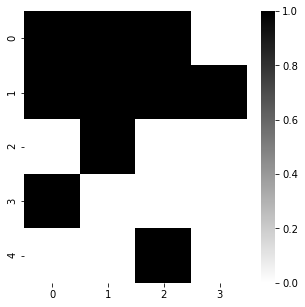

In [32]:
matrix = np.array([[1,1,0,1,0],[1,1,1,0,0],[1,1,0,0,1],[0,1,0,0,0]])
df_mat = pd.DataFrame(matrix).T

fig, ax= plt.subplots(figsize=(5,5))
_ = sns.heatmap(df_mat, cmap='gray_r', ax=ax)
plt.savefig('meta_analysis.svg', format='svg')